# Resampling Data

Brittany Lassiter

## Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url ="Data/london_weather_MODIFIED - london_weather_MODIFIED.csv"
df = pd.read_csv(url)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


## Converting date into correct Dateframe

In [2]:
# Recognizes dates and does not interpret them as seconds
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

In [3]:
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


## Filtering Data requested

In [4]:
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 
                      'max_temp', 'snow_depth']]

df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


In [5]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [6]:
## interpolating temperature measures
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

In [7]:
df.isna().sum()

precipitation     390
mean_temp           0
min_temp            0
max_temp            0
snow_depth       1752
dtype: int64

In [8]:
# filling preciptation/snow with 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

In [9]:
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Q1: What month had the most precipitation between 2000 through 2010?

In [10]:
df_MS_res = df.resample("MS").sum()['precipitation']
df_MS_res.name = 'Resampled'
df_MS_res.head()

date
2000-01-01    14.3
2000-02-01    62.2
2000-03-01    13.4
2000-04-01    71.8
2000-05-01    68.4
Freq: MS, Name: Resampled, dtype: float64

In [11]:
precip_col = ['precipitation']
plot_df = df.loc['2000':'2010',precip_col]
plot_df

,precipitation
date,
2000-01-01,0.0
2000-01-02,0.2
2000-01-03,6.0
2000-01-04,0.2
2000-01-05,0.8
...,...
2010-12-27,5.0
2010-12-28,0.4
2010-12-29,1.4


In [12]:
from matplotlib import dates as mdates

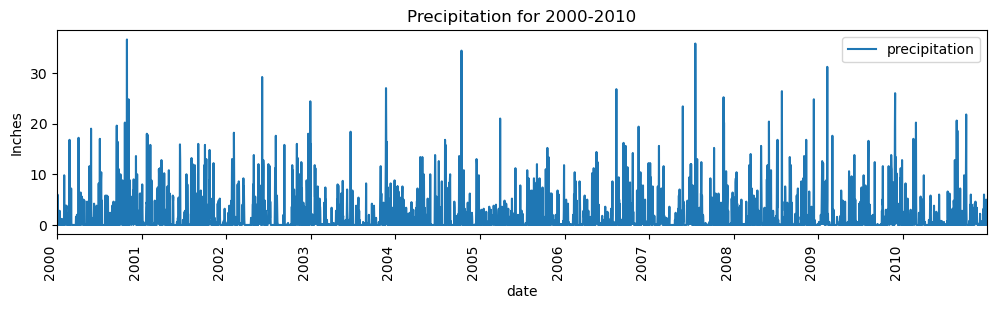

In [13]:
## Plot the data
ax = plot_df.plot(figsize=(12,3))
ax.set(title='Precipitation for 2000-2010', ylabel='Inches')

# customize major ticks 
major_loc =  mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=3)
minor_fmt = mdates.DateFormatter("%b")

ax.xaxis.set_minor_locator(major_loc)
ax.xaxis.set_minor_formatter(major_fmt)

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

In [14]:
date_max_precip = df['precipitation'].idxmax()
max_precip = df['precipitation'].max()

print(f"The highest daily preciptation was {max_precip} inches, which occured on {date_max_precip.strftime('%B %d, %Y')} which was a {date_max_precip.day_name()}.")

The highest daily preciptation was 51.6 inches, which occured on August 26, 2015 which was a Wednesday.


# Q2: Which year between 2000-2020 had the coolest average temperature?

In [15]:
df_A_res = df.resample("A").mean()['mean_temp']
df_A_res.name = 'Resampled Mean'
df_A_res.head()

date
2000-12-31    11.575683
2001-12-31    11.331507
2002-12-31    12.084247
2003-12-31    12.114521
2004-12-31    11.900683
Freq: A-DEC, Name: Resampled Mean, dtype: float64

In [16]:
mean_temp_col = ['mean_temp']
plot_mean_df = df.loc['2000':'2020',mean_temp_col]
plot_mean_df

,mean_temp
date,
2000-01-01,7.0
2000-01-02,7.9
2000-01-03,9.4
2000-01-04,7.0
2000-01-05,6.4
...,...
2020-12-27,7.5
2020-12-28,1.1
2020-12-29,2.6


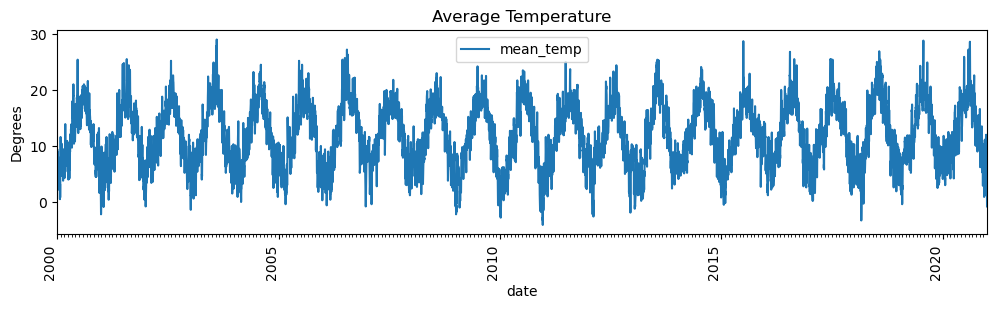

In [17]:
## Plot the data
ax = plot_mean_df.plot(figsize=(12,3))
ax.set(title='Average Temperature', ylabel='Degrees')


# customize major ticks 
major_loc =  mdates.YearLocator(5)
major_fmt = mdates.DateFormatter("%Y")


ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc =  mdates.MonthLocator(interval=1)
ax.xaxis.set_minor_locator(minor_loc)

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which='major',rotation=90)

In [18]:
date_min_temp = df['mean_temp'].idxmax()
min_temp = df['mean_temp'].max()

print(f"The lowest temperature of {min_temp} degrees occured on {date_min_temp.strftime('%B %d, %Y')} which was a {date_min_temp.day_name()}.")

The lowest temperature of 29.0 degrees occured on August 10, 2003 which was a Sunday.
